
        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.


<h1 align='center' style="color: darkgreen;">Group Project - Fall 2022</h1>

We have worked as a team for this project. Our job was to develop a predictive model that can predict whether or not a movie is a <i>Drama</i>. In order to do so- we have used the textual features of the movie stories and created our predictive models.

There are three different files, which we have used to build this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories, which has been used for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file was not used for model development purposes. We used this file after developing our predictive models and selecting our best final model. We have used our best predictive model to predict whether the movies in <b>movie story evaluation file.csv</b> belong to <b>'Drama'</b> category or <b>'Not Drama'</b> category.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

In [11]:
#import the required libraries and modules
import pandas as pd
import numpy as np


In [12]:
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [13]:
#create a dataframe from the file that contains movie stories
movies_df = pd.read_csv("movie_story_student_file.csv")
movies_df.head()

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...


In [14]:
#create a dataframe from the file that contain movie titles and genres
genre_df=pd.read_csv("movies.csv")
genre_df.head()

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller


In [10]:
#merge the two dataframes using common identifier movieid and create a new dataframe
df = pd.merge(movies_df, genre_df, left_on='movie_id', right_on='movieId')
df.head()

,movie_id,story,movieId,title,genres
0,131072,A girl who always tends to fall in love with t...,131072,Jesus liebt mich (2012),Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",196609,Bigfoot The Movie (2015),Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",131074,Mount St. Elias (2009),Documentary
3,196611,"In her first special since 2003, Ellen revisit...",196611,Ellen DeGeneres: Relatable (2018),Comedy
4,196613,Mike and Sulley are back at Monsters Universit...,196613,Party Central (2014),Animation|Children|Comedy|Fantasy


In [11]:
#drop title column and repeating column movieid
df= df.drop(columns=['movieId','title'], axis=1)
df.head()

,movie_id,story,genres
0,131072,A girl who always tends to fall in love with t...,Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary
3,196611,"In her first special since 2003, Ellen revisit...",Comedy
4,196613,Mike and Sulley are back at Monsters Universit...,Animation|Children|Comedy|Fantasy


In [12]:
#check for the null values in genre column
find= pd.isnull(df['genres'])


In [13]:
#remove the rows where genre is not mentioned
df = df[df["genres"].str.contains("no genres listed") == False]

In [14]:
#create a filter for drama genre 
drama = df['genres'].str.contains('Drama','drama')

In [15]:
#create a filter for not drama genre movies
not_drama= df['genres'].str.contains('Drama','drama')==False

In [16]:
#show the first five rows in merged dataset
df.head()

,movie_id,story,genres
0,131072,A girl who always tends to fall in love with t...,Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary
3,196611,"In her first special since 2003, Ellen revisit...",Comedy
4,196613,Mike and Sulley are back at Monsters Universit...,Animation|Children|Comedy|Fantasy


In [17]:
#make a copy of dataframe in this stage for future use
new_df=df.copy()

In [18]:
#apply filter on the dataframe to convert genres in 1 and 0 for drama and not drama 
df.genres[drama]= 1
df.genres[not_drama]=0


In [19]:
#show length of new dataframe
len(df)

18886

In [20]:
#rename the columns as required
df = df.rename(columns={'movie_id':'movieid', 'genres':'DramaGenre'})

In [21]:
#import regex module
import re
# function for text cleaning 
def clean_text(text):
    # remove backslash-and subsequent charecters and digits
    text= re.sub(r'\\\w.+?\d*','',text) 
    #remove only backslashes
    text = re.sub(r'\\','',text)
    #remove all digits from text
    text = re.sub(r'\d','',text)
    #remove all non alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]','',text)
    
    return text

In [22]:
#apply the text cleaning function to clean text in movie stories
df['story'] = df['story'].apply(lambda x: clean_text(x))

In [23]:
#assign the dataframe as main_dataset
main_dataset = df
#show the first five rows of dataframe
main_dataset.head()

,movieid,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,196609,Bigfoot has come to the town of Ellwood City P...,0
2,131074,At an altitude of feet Alaskas Mount St Elias...,0
3,196611,In her first special since Ellen revisits her...,0
4,196613,Mike and Sulley are back at Monsters Universit...,0


In [24]:
#assign the stories and dramagenre columns to seperate dataframes
data = main_dataset['story']
y= main_dataset['DramaGenre']
y=y.astype('int')

In [25]:
#show a random story from the assigned dataframe
data[1]

'Bigfoot has come to the town of Ellwood City PA and is causing BIG problems Now its up to three town locals to take him down  Funded by a Kickstarter campaign and filmed in Ellwood City LA Filmmaker and hometown hero Jared Show assembled a colorful cast of characters from all over the region to bring his vision to life  The movie features some of Pittsburghs most famous and best loved celebrities like Curt Wootton Pittsburgh Dad Joanie Dodds Americas Next Top Model Jim Krenn standup comic formerly of the WDVE morning show Mike Wysocki WDVE and even veteran news anchor Darieth Chisolm formerly of WPXI among others  In this comedyhorror flick mullets guns and beer are in full supply as the movie skewers the Pittsburgh Yinzer stereotype right alongside the Bigfoot myth'

#### Building models for prediction

In [26]:
#import the required packages and modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
#split the dataset in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=.3, random_state=0, stratify=y)

In [29]:
#declare the five fold cross validation
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

In [981]:
#define the count vectorizer 
count_vec= CountVectorizer(stop_words='english',  max_df=0.6,ngram_range=(1,3))
#fit the training data with count vectorizer
cv_train= count_vec.fit_transform(X_train)
#transform the count vectorizer with test data
cv_test=count_vec.transform(X_test)

In [982]:
#define the tfidf vectorizer
tfidf_vec= TfidfVectorizer(stop_words='english', max_df=0.6,ngram_range=(1,3))
#fit the tfidf vectorizer with training data
tfidf_train= tfidf_vec.fit_transform(X_train)
#transform the tfidf vectorizer using test data
tfidf_test=tfidf_vec.transform(X_test)

In [983]:
#import the multinomial naive bays modle 
from sklearn.naive_bayes import MultinomialNB
#assign a name to the model
count_nb = MultinomialNB()
#fit the model with count vectorizer training data output vector
count_nb.fit(cv_train,y_train)
#predict with count vectorizer test data output vector
count_y_test_hat=count_nb.predict(cv_test)
#get the accuracy score for this prediction
count_nb_score = accuracy_score(y_test, count_y_test_hat)

#assign a name to the model
tfidf_nb = MultinomialNB()
#fit the model with tfidf vectorizer training data output vector
tfidf_nb.fit(tfidf_train,y_train)
#predict with tfidf vectorizer test data output vector
tfidf_y_test_hat=count_nb.predict(tfidf_test)
#get the accuracy score for this prediction
tfidf_nb_score = accuracy_score(y_test, tfidf_y_test_hat)

#print accuracy scores of multinomialNB model with countvectorizer and tfidfvectorizer
print("Multinomial Naive Bays Accuracy score with Countvectorizer: ",round(count_nb_score*100,2))
print("Multinomial Naive Bays Accuracy score with Tfidfvectorizer: ",round(tfidf_nb_score*100,2))

Multinomial Naive Bays Accuracy score with Countvectorizer:  68.27
Multinomial Naive Bays Accuracy score with Tfidfvectorizer:  67.05


In [984]:
#import linear SVC model
from sklearn.svm import LinearSVC
#assign a name to the model
tfidf_svc= LinearSVC()
#fit the model with tfidf vectorizer training data output vector
tfidf_svc.fit(tfidf_train,y_train)
#predict with tfidf vectorizer test data output vector
tfidf_svc_y_hat = tfidf_svc.predict(tfidf_test)
#get the accuracy score for this prediction
tfidf_svc_score= accuracy_score(y_test, tfidf_svc_y_hat)

#print accuracy score of linear SVC model with tfidfvectorizer
print("Linear SVC Accuracy score with Tfidfvectorizer: ",round(tfidf_svc_score*100,2))

Linear SVC Accuracy score with Tfidfvectorizer:  69.98


In [986]:
#import Logistic Regression model
from sklearn.linear_model import LogisticRegression
#assign a name to the model
tfidf_lr= LogisticRegression(max_iter=300, C=10000)
#fit the model with tfidf vectorizer training data output vector
tfidf_lr.fit(tfidf_train,y_train)
#predict with tfidf vectorizer test data output vector
tfidf_lr_y_hat = tfidf_lr.predict(tfidf_test)
#get the accuracy score for this prediction
tfidf_lr_score= accuracy_score(y_test, tfidf_lr_y_hat)
#print accuracy score of logistic regression model with tfidfvectorizer
print("Logistic Regression Accuracy score with Tfidfvectorizer: ",round(tfidf_lr_score*100,2))

Logistic Regression Accuracy score with Tfidfvectorizer:  69.7


<ul><h4>Using Lemmatization of text</h4>

In [987]:
#import the modules
from html import unescape
import spacy
#load the spacy module
spacy.load('en_core_web_sm')
#define lemmatizer
lemmatizer = spacy.lang.en.English()

# defining new tokenizer
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

# remove html entities from docs and
# set everything to lowercase
def my_preprocessor(doc):
    return(unescape(doc).lower())

In [1006]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#initialize the vectorizer with preprocessor
custom_vec = TfidfVectorizer( preprocessor=my_preprocessor, stop_words='english',
                             ngram_range=(1,3))
#fit the vectorizer with text data
X = custom_vec.fit_transform(data)
#split the dataset in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0, stratify=y)

In [1007]:
#using SGD classifier
#calculate accuracy of model with new preprocessed data
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("With preprocessing  SGDclassifier model mean accuracy score: ",round(accuracy_score(y_test,y_test_hat) * 100,2))

With preprocessing  SGDclassifier model mean accuracy score:  68.81


In [989]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
#define parameter for logistic regression model
C1 = np.logspace(-4, 4,20)
LR_params = {'C': C1}
#define gridsearch model
LR_grid = GridSearchCV(LR_model, LR_params, cv=cv, return_train_score = True, scoring='accuracy')
#fit training dataset with grid
LR_grid.fit(X_train,y_train)
#define the best model from grid search
LR_bestModel = LR_grid.best_estimator_
#predict with the best model
LR_y_test_hat = LR_bestModel.predict(X_test)
#calculate accuracy score
LR_out_acc = accuracy_score(y_test,LR_y_test_hat, normalize=True)
print("Logistic regression model Best Parameter:) {}".format(LR_grid.best_params_))
print(f"Out of sample accuracy score of Logistic Regresseion model : {LR_out_acc:.4f}")


Logistic regression model Best Parameter:) {'C': 3792.690190732246}
Out of sample accuracy score of Logistic Regresseion model : 0.6961


In [991]:
#define the model with best model from gridsearch
LR_model=LR_bestModel
#calculate accuracy of model
LR_accuracy = cross_validate(LR_model,  X_train, y_train, scoring='accuracy', cv=cv)
#calculate precision of model
LR_precision = cross_validate(LR_model,  X_train, y_train, scoring='precision_macro', cv=cv)
#calculate recall score of model
LR_recall = cross_validate(LR_model,  X_train, y_train, scoring='recall_macro', cv=cv)
#calculate F1 score of model
LR_f1_score = cross_validate(LR_model,  X_train, y_train, scoring='f1_weighted', cv=cv)
#roc-auc score of model
LR_roc_auc_score = cross_validate(LR_model,  X_train, y_train, scoring='roc_auc_ovo_weighted', cv=cv)
#print the scores
#print accuracy
print(f"With preprocessing Logistic Regression model mean accuracy score=",round(np.mean(LR_accuracy['test_score'])*100,2) )
#print precision score
print(f"With preprocessing Logistic Regression model mean precision score= ",round(np.mean(LR_precision['test_score'])*100,2) )
#print recall score
print(f"With preprocessing Logistic Regression model mean recall score= ",round(np.mean(LR_recall['test_score'])*100,2) )
#print F1 score
print(f"With preprocessing Logistic Regression model mean f1 score= ",round(np.mean(LR_f1_score['test_score'])*100,2) )
#print roc-auc score
print(f"With preprocessing Logistic Regression model mean ROC AUC score= ",round(np.mean(LR_roc_auc_score['test_score'])*100,2) )

With preprocessing Logistic Regression model mean accuracy score= 70.11
With preprocessing Logistic Regression model mean precision score=  69.97
With preprocessing Logistic Regression model mean recall score=  69.01
With preprocessing Logistic Regression model mean f1 score=  69.74
With preprocessing Logistic Regression model mean ROC AUC score=  77.13


In [1002]:
#initialize the vectorizer with preprocessor and tokenizer 
custom_vec = TfidfVectorizer( preprocessor=my_preprocessor,tokenizer=my_tokenizer,stop_words='english',
                             ngram_range=(1,4))
#fit with text data
X = custom_vec.fit_transform(data)
#split the datasets in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0, stratify=y)

In [1003]:
#calculate accuracy of model with new lemmatized data
LR_accuracy = cross_validate(LR_model,  X_train, y_train, scoring='accuracy', cv=cv)
#print accuracy
print(f"With preprocessing and lemmatization Logistic Regression model mean accuracy score=",round(np.mean(LR_accuracy['test_score'])*100,2) )

With preprocessing and lemmatization Logistic Regression model mean accuracy score= 55.39


In [1005]:
#using SGD classifier
#calculate accuracy of model with new lemmatized data
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("With preprocessing and lemmatization SGDclassifier model mean accuracy score: ",round(accuracy_score(y_test,y_test_hat) * 100,2))

With preprocessing and lemmatization SGDclassifier model mean accuracy score:  55.45


##### By using Glove 300 dimension word embedding 

In [1029]:
from tqdm import tqdm
embeddings_index = dict()
f = open('glove.42B.300d/glove.42B.300d.txt',encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

1917494it [05:25, 5899.71it/s]


In [1030]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
embeddings = []
for text in tqdm(data):

    base_embedding = np.zeros((300,))
    word_count = 0
    for token in word_tokenize(text):
        token = token.lower()
        if token in stopwords.words('english'):
            continue
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas_nmr2rze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 18886/18886 [06:02<00:00, 52.04it/s] 


In [1031]:
X_we_3 = np.array(embeddings, dtype='float64')
X_train_we_3, X_test_we_3, y_train_we_3, y_test_we_3 = train_test_split(X_we_3,y, test_size=.3, random_state=0, stratify=y)

In [1032]:
#initialize the logistic regression model
LR_model_1=LogisticRegression(max_iter=1000, C=1)
#calculate accuracy of model
LR_accuracy_we_3 = cross_validate(LR_model_1,  X_train_we_3, y_train_we_3, scoring='accuracy', cv=cv)
#print accuracy
print(f"Logistic Regression model mean accuracy score with 300d word embedding =",round(np.mean(LR_accuracy_we_3['test_score'])*100,2) )

Logistic Regression model mean accuracy score with 300d word embedding = 69.78


##### Using truncated SVD method 

In [1037]:
from sklearn.decomposition import TruncatedSVD
#initialize the tfidvectorizer with lemmatization
custom_vec = TfidfVectorizer( preprocessor=my_preprocessor,stop_words='english',
                             ngram_range=(1,3))
X = custom_vec.fit_transform(data).astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0, stratify=y)



In [1038]:
#reducing the number of components with truncated SVD
tsvd = TruncatedSVD(n_components = 100)
X_tsvd = tsvd.fit_transform(X)

In [1039]:
X_tsvd_train, X_tsvd_test, y_tsvd_train, y_tsvd_test = train_test_split(X_tsvd,y, test_size=.3, random_state=0, stratify=y)

In [1040]:
from sklearn.svm import SVC
SVM_model = SVC(kernel='rbf')
SVM_model.fit(X_tsvd_train, y_tsvd_train)
y_test_hat = SVM_model.predict(X_tsvd_test)
print("Accuracy for SVM Classifier: ",round(accuracy_score(y_tsvd_test,y_test_hat) * 100,2))

Accuracy for SVM Classifier:  68.3


In [1041]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(solver='adam',random_state=0, max_iter=500)
NN_model.fit(X_tsvd_train, y_tsvd_train)
y_test_hat = NN_model.predict(X_tsvd_test)
print("Accuracy for Neural network Classifier: ",round(accuracy_score(y_tsvd_test,y_test_hat) * 100,2))

Accuracy for Neural network Classifier:  66.25


In [1042]:
#Random Forest Classifier Model
#import random forest classifier model
from sklearn.ensemble import RandomForestClassifier
#define the model
RF_model= RandomForestClassifier()
RF_model.fit(X_tsvd_train, y_tsvd_train)
y_test_hat = RF_model.predict(X_tsvd_test)
print("Accuracy for Random Forest Classifier: ",round(accuracy_score(y_tsvd_test,y_test_hat) * 100,2))

Accuracy for Random Forest Classifier:  65.97


<ul>By applying tensors on trunkated SVD

In [1044]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [1046]:
#initialize the tensors
tf.convert_to_tensor( X_tsvd_train)
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_tsvd_train)

In [1047]:
#define a model to add layers
def get_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [1050]:
#initialize the model
model = get_model()
model.fit(X_tsvd_train, y_tsvd_train, epochs=10, batch_size=1000)

Epoch 1/10
14/14 [==============================] - 1s 30ms/step - loss: 0.6623 - accuracy: 0.5717
Epoch 2/10
14/14 [==============================] - 0s 29ms/step - loss: 0.5844 - accuracy: 0.6681
Epoch 3/10
14/14 [==============================] - 0s 29ms/step - loss: 0.5566 - accuracy: 0.6862
Epoch 4/10
14/14 [==============================] - 0s 29ms/step - loss: 0.5309 - accuracy: 0.7064
Epoch 5/10
14/14 [==============================] - 0s 30ms/step - loss: 0.5044 - accuracy: 0.7300
Epoch 6/10
14/14 [==============================] - 0s 28ms/step - loss: 0.4768 - accuracy: 0.7524
Epoch 7/10
14/14 [==============================] - 0s 28ms/step - loss: 0.4391 - accuracy: 0.7781
Epoch 8/10
14/14 [==============================] - 0s 29ms/step - loss: 0.4040 - accuracy: 0.8043
Epoch 9/10
14/14 [==============================] - 0s 29ms/step - loss: 0.3726 - accuracy: 0.8210
Epoch 10/10
14/14 [==============================] - 0s 30ms/step - loss: 0.3446 - accuracy: 0.8377


In [1051]:
#predict with the model
y_tsvd_test_hat = (model.predict(X_tsvd_test) > 0.5).astype("int32")

178/178 [==============================] - 1s 5ms/step


In [1052]:
from sklearn.metrics import classification_report, confusion_matrix 
print("Confusion Matrix") 
print(confusion_matrix(y_tsvd_test,y_tsvd_test_hat)) 
print(classification_report(y_tsvd_test,y_tsvd_test_hat))

Confusion Matrix
[[2381  761]
 [1156 1368]]
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      3142
           1       0.64      0.54      0.59      2524

    accuracy                           0.66      5666
   macro avg       0.66      0.65      0.65      5666
weighted avg       0.66      0.66      0.66      5666



### By selecting the top genres from dataset

<ul>Since our dataset is poorly balanced,we can increase the performance of our models by reducing the total number of genres in the dataset

In [3]:
#get unique values of movie genres
import pandas as pd
import numpy as np
genres=pd.DataFrame(genre_df.genres.unique())
genres.shape

(1055, 1)

In [64]:
#get movies contains drama in genre
new_df.genres.str.contains('Drama'or'drama').value_counts()[True]

8412

In [65]:
#get movies that does not contain drama in genre
new_df.genres.str.contains('Drama'or'drama').value_counts()[False]

10474

In [66]:
#create a filter for not dram genres
not_dr=new_df['genres'].str.contains('Drama','drama')==False

In [67]:
#create a dataframe with count of genres
cout= pd.DataFrame(new_df.genres.value_counts())

In [68]:
#visualize the dataframe
cout.head(20)         

,genres
Drama,3044
Documentary,2358
Comedy,1690
Comedy|Drama,892
Drama|Romance,607
Horror,541
Comedy|Romance,478
Horror|Thriller,442
Comedy|Drama|Romance,398
Drama|Thriller,392


In [69]:
#create a new dataset with 10 highest number of genres
arr = cout.nlargest(10,'genres')

In [70]:
#visualize the dataset
arr

,genres
Drama,3044
Documentary,2358
Comedy,1690
Comedy|Drama,892
Drama|Romance,607
Horror,541
Comedy|Romance,478
Horror|Thriller,442
Comedy|Drama|Romance,398
Drama|Thriller,392


In [71]:
#change the index of dataset
arr['genre'] = arr.index

In [72]:
#rename the columns
arr.columns=['count','genre']

In [73]:
#reset the index to add a new index
arr=arr.reset_index()
arr.head()

,index,count,genre
0,Drama,3044,Drama
1,Documentary,2358,Documentary
2,Comedy,1690,Comedy
3,Comedy|Drama,892,Comedy|Drama
4,Drama|Romance,607,Drama|Romance


In [74]:
#now drop the column named index
arr.drop(columns=['index'],axis=1)

,count,genre
0,3044,Drama
1,2358,Documentary
2,1690,Comedy
3,892,Comedy|Drama
4,607,Drama|Romance
5,541,Horror
6,478,Comedy|Romance
7,442,Horror|Thriller
8,398,Comedy|Drama|Romance
9,392,Drama|Thriller


In [75]:
#create a new dataset from the original dataset where genres are in top 10 list
mod_df=new_df[new_df['genres'].isin([i for i in arr.genre])].reset_index()

In [76]:
#drop the index column
mod_df=mod_df.drop(columns=['index'],axis=1)

In [77]:
#visualize the first five rows
mod_df.head()

,movie_id,story,genres
0,131072,A girl who always tends to fall in love with t...,Comedy
1,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary
2,196611,"In her first special since 2003, Ellen revisit...",Comedy
3,196621,"When a beautiful ballerina dancer, Adriana Men...",Horror
4,131090,Jonas is 18-years-old and has had to repeat se...,Comedy


In [78]:
#get shape of the dataset
mod_df.shape

(10842, 3)

In [79]:
#visualize the column names
mod_df.columns

Index(['movie_id', 'story', 'genres'], dtype='object')

In [81]:
#create filters
drama_mod = mod_df['genres'].str.contains('Drama','drama')

In [83]:
#create filters
not_drama_mod= mod_df['genres'].str.contains('Drama','drama')==False

In [84]:
#rename the columns as required
mod_df = mod_df.rename(columns={'movie_id':'movieid', 'genres':'DramaGenre'})

In [85]:
#apply filters to change dramagenre to 1 else 0
mod_df.DramaGenre[drama_mod]= 1
mod_df.DramaGenre[not_drama_mod]=0

In [86]:
#vissualize the first 10 rows
mod_df.head(10)

,movieid,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",0
2,196611,"In her first special since 2003, Ellen revisit...",0
3,196621,"When a beautiful ballerina dancer, Adriana Men...",0
4,131090,Jonas is 18-years-old and has had to repeat se...,0
5,65558,The Recruiter takes viewers to the Louisiana c...,0
6,196631,The tense marriage between two painters is sha...,1
7,131100,David Sieveking left home years ago to make fi...,0
8,196637,Three estranged sisters deal with the death of...,1
9,196639,How do we cope with the unthinkable? Tuva Novo...,1


In [87]:
#check shape of the new dataset
mod_df.shape

(10842, 3)

In [88]:
#import regex module
import re
# function for text cleaning 
def clean_text(text):
    # remove backslash-and subsequent charecters and digits
    text= re.sub(r'\\\w.+?\d*','',text) 
    #remove only backslashes
    text = re.sub(r'\\','',text)
    #remove all digits from text
    text = re.sub(r'\d','',text)
    #remove all non alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]','',text)
    
    return text

In [89]:
#clean the dataset using the function
mod_df['story'] = mod_df['story'].apply(lambda x: clean_text(x))

In [90]:
#create a copy for working
main_dataset_mod = mod_df
main_dataset_mod.head()

,movieid,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,131074,At an altitude of feet Alaskas Mount St Elias...,0
2,196611,In her first special since Ellen revisits her...,0
3,196621,When a beautiful ballerina dancer Adriana Mena...,0
4,131090,Jonas is yearsold and has had to repeat severa...,0


In [91]:
#assign the stories and dramagenre columns to seperate dataframes
data_mod = main_dataset_mod['story']
y_mod= main_dataset_mod['DramaGenre']
y_mod=y_mod.astype('int')

In [92]:
#visualize a random story from the data
data_mod[1]

'At an altitude of  feet Alaskas Mount St Elias is the destination for a trio of mountaineers determined to reach the mountains summit and to ski back down as well Mount St Elias documents their journey as they trek the fine line between bravery and madness'

In [93]:
#import required modules and packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
#split the dataset in train and test sets
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(data_mod,y_mod, test_size=.3, random_state=0, stratify=y_mod)

In [ ]:
#define and initialize countvectorizer
count_vec_mod= CountVectorizer(stop_words='english',min_df=.1,max_df=.9,ngram_range=(1,5))
cv_train_mod= count_vec.fit_transform(X_train_mod)
cv_test_mod=count_vec.transform(X_test_mod)

In [ ]:
#define and initialize tfidf vectorizer
tfidf_vec_mod= TfidfVectorizer(stop_words='english',min_df=.1,max_df=.9,ngram_range=(1,5))
tfidf_train_mod= count_vec.fit_transform(X_train_mod)
tfidf_test_mod=count_vec.transform(X_test_mod)

In [1059]:
#check accuracy with multinomial NB
from sklearn.naive_bayes import MultinomialNB
count_nb_mod = MultinomialNB()
count_nb_mod.fit(cv_train_mod,y_train_mod)
count_y_test_hat_mod=count_nb_mod.predict(cv_test_mod)
count_nb_score_mod = accuracy_score(y_test_mod, count_y_test_hat_mod)


print("Multinomial Naive Bays Accuracy score with Countvectorizer: ",round(count_nb_score_mod*100,2))


Multinomial Naive Bays Accuracy score with Countvectorizer:  71.56


In [1060]:
#check accuracy score with logistic regression
from sklearn.linear_model import LogisticRegression
tfidf_lr_mod= LogisticRegression(max_iter=300, C=10000)
tfidf_lr_mod.fit(tfidf_train_mod,y_train_mod)
tfidf_lr_y_hat_mod = tfidf_lr_mod.predict(tfidf_test_mod)
tfidf_lr_score_mod= accuracy_score(y_test_mod, tfidf_lr_y_hat_mod)

print("Logistic Regression Accuracy score with Tfidfvectorizer: ",round(tfidf_lr_score_mod*100,2))

Logistic Regression Accuracy score with Tfidfvectorizer:  71.63


In [1061]:
#define function for preprocessing and lemmatization
from html import unescape
import spacy

spacy.load('en_core_web_sm')
lemmatizer = spacy.lang.en.English()

# defining new tokenizer
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

# remove html entities from docs and
# set everything to lowercase
def my_preprocessor(doc):
    return(unescape(doc).lower())

In [1062]:
#implement tfidf vectorizer with preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
custom_vec = TfidfVectorizer( preprocessor=my_preprocessor, stop_words='english',
                             ngram_range=(1,5))
X_mod = custom_vec.fit_transform(data_mod)
X_train, X_test, y_train, y_test = train_test_split(X_mod,y_mod, test_size=.3, random_state=0, stratify=y_mod)

In [60]:
#declare the five fold cross validation
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

In [1064]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
#define parameter for logistic regression model
C1 = np.logspace(-2, 4,20)
LR_params = {'C': C1}
#define gridsearch model
LR_grid = GridSearchCV(LR_model, LR_params, cv=cv, return_train_score = True, scoring='accuracy')
#fit training dataset with grid
LR_grid.fit(X_train,y_train)
#define the best model from grid search
LR_bestModel = LR_grid.best_estimator_
#predict with the best model
LR_y_test_hat = LR_bestModel.predict(X_test)
#calculate accuracy score
LR_out_acc = accuracy_score(y_test,LR_y_test_hat, normalize=True)
print("Logistic regression model Best Parameter:) {}".format(LR_grid.best_params_))
print(f"Out of sample accuracy score of Logistic Regresseion model :",round(LR_out_acc*100,2))


Logistic regression model Best Parameter:) {'C': 4832.930238571752}
Out of sample accuracy score of Logistic Regresseion model : 72.15


In [1066]:
#calculate accuracy of model
LR_accuracy = cross_validate(LR_bestModel,  X_train, y_train, scoring='accuracy', cv=cv)
#calculate precision of model
LR_precision = cross_validate(LR_bestModel,  X_train, y_train, scoring='precision_macro', cv=cv)
#calculate recall score of model
LR_recall = cross_validate(LR_bestModel,  X_train, y_train, scoring='recall_macro', cv=cv)
#calculate F1 score of model
LR_f1_score = cross_validate(LR_bestModel,  X_train, y_train, scoring='f1_weighted', cv=cv)
#roc-auc score of model
LR_roc_auc_score = cross_validate(LR_bestModel,  X_train, y_train, scoring='roc_auc_ovo_weighted', cv=cv)
#print the scores
#print accuracy
print(f"Logistic Regression model mean accuracy score= ",round(np.mean(LR_accuracy['test_score'])*100,2) )
#print precision score
print(f"Logistic Regression model mean precision score= ",round(np.mean(LR_precision['test_score'])*100,2) )
#print recall score
print(f"Logistic Regression model mean recall score= ",round(np.mean(LR_recall['test_score'])*100,2) )
#print F1 score
print(f"Logistic Regression model mean f1 score= ",round(np.mean(LR_f1_score['test_score'])*100,2) )
#print roc-auc score
print(f"Logistic Regression model mean ROC AUC score= ",round(np.mean(LR_roc_auc_score['test_score'])*100,2) )

Logistic Regression model mean accuracy score=  73.32
Logistic Regression model mean precision score=  73.32
Logistic Regression model mean recall score=  73.32
Logistic Regression model mean f1 score=  73.32
Logistic Regression model mean ROC AUC score=  81.31


<ul><h4>With topic modeling</h4>

In [384]:
#import the required module
from sklearn.decomposition import LatentDirichletAllocation

In [608]:
#initialize countvectorizer
vect = CountVectorizer(max_features=20000, max_df=.60, 
                       stop_words="english")
X_l = vect.fit_transform(data_mod)
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, learning_method="batch",
                                max_iter=100, random_state=0) 
document_topics = lda.fit_transform(X_l)


In [611]:
#initialize and predict accuracy using logistic regression
model = LogisticRegression(C=4833)
X_train, X_test, y_train, y_test = train_test_split(document_topics, y_mod, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify = y_mod)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy score of Logistic Regression with topic modelling: ",round(accuracy_score(y_test,y_test_hat) * 100,2))

Accuracy score of Logistic Regression with topic modelling:  65.45


<ul><h4>With 300 dimensions word embedding using Glove</h4>

In [61]:
#import the modules
from tqdm import tqdm
embeddings_index = dict()
f = open('glove.42B.300d/glove.42B.300d.txt',encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

1917494it [03:08, 10172.18it/s]


In [96]:
#create the embedded array using text data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
embeddings = []
for text in tqdm(data_mod):

    base_embedding = np.zeros((300,))
    word_count = 0
    for token in word_tokenize(text):
        token = token.lower()
        if token in stopwords.words('english'):
            continue
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas_nmr2rze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 10842/10842 [02:14<00:00, 80.67it/s] 


In [97]:
#initialize the array as predictor values
X_we = np.array(embeddings, dtype='float32')
X_train_we, X_test_we, y_train_we, y_test_we = train_test_split(X_we,y_mod, test_size=.3, random_state=0, stratify=y_mod)

In [603]:
#predict accuracy using logistic regression
LR_model_1=LogisticRegression(C=10000)
LR_accuracy_we = cross_validate(LR_model_1,  X_train_we, y_train_we, scoring='accuracy', cv=cv)#calculate accuracy of model
print(f"Logistic Regression model mean accuracy score with 300d word embedding : ",round(np.mean(LR_accuracy_we['test_score'])*100,2))#print accuracy

Logistic Regression model mean accuracy score with 300d word embedding :  72.75


#### With Neural Network model on 300 dim word embedding

In [396]:
#initialize the neural network model
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(solver='adam',random_state=0, max_iter=500)#declare the neural network model

In [582]:
#predict accuracy using neural network model
NN_model.fit(X_train_we, y_train_we)
NN_y_test_hat = NN_model.predict(X_test_we)
NN_out_acc = accuracy_score(y_test_we,NN_y_test_hat, normalize=True)
print(f"Out of sample accuracy score of Nural Network Classifier model with 300d word embedding : ",round(NN_out_acc*100,2))
NN_accuracy = cross_validate(NN_model,  X_train_we, y_train_we, scoring='accuracy', cv=cv)#calculate accuracy of model
print(f"With 300 word embedding Neural network model mean accuracy score :", round(np.mean(NN_accuracy['test_score'])*100,2) )

Out of sample accuracy score of Nural Network Classifier model with 300d word embedding :  70.61
With 300 word embedding Neural network model mean accuracy score : 72.43


#### With Support Vector Classification model on 300 dim word embedding

In [98]:
#initialize and predict accuracy using SVM model
from sklearn.svm import SVC
SVM_model = SVC(kernel='rbf',C=5, gamma=.1)
SVM_model.fit(X_train_we, y_train_we)
y_test_hat = SVM_model.predict(X_test_we)
print("Out of sample accuracy score of SVM Classifier with 300d word embedding: {}".format(round(accuracy_score(y_test_we,y_test_hat) * 100,2)))
SVM_accuracy_we = cross_validate(SVM_model,  X_train_we, y_train_we, scoring='accuracy', cv=cv)#calculate accuracy of model
print(f"SVM Classifier model mean accuracy score with 300d word embedding : ",round(np.mean(SVM_accuracy_we['test_score'])*100,2))#print accuracy

Out of sample accuracy score of SVM Classifier with 300d word embedding: 74.3
SVM Classifier model mean accuracy score with 300d word embedding :  74.71


#### With stochastic gradient descent model on 300 dim word embedding

In [450]:
#initialize and predict accuracy using SGD classifier
from sklearn.linear_model import SGDClassifier
SGD_model = SGDClassifier(alpha=.001)
SGD_model.fit(X_train_we, y_train_we)
y_test_hat = SGD_model.predict(X_test_we)
print("Accuracy for SGDClassifier: {}".format(round(accuracy_score(y_test_we,y_test_hat) * 100,2)))

Accuracy for SGDClassifier: 72.61


<ul><h5>So far our best model is SVM model, we shall fit this model with whole dataset</h5>

In [99]:
#fit the whole data with best accuracy model(SVM)
SVM_model.fit(X_we, y_mod)

SVC(C=5, gamma=0.1)

In [100]:
import pickle
pickle.dump(SVM_model, open('SVM_model.pkl','wb'))

### Topic modelling with LatentDirichletAllocation 

In [597]:
from sklearn.decomposition import LatentDirichletAllocation
vect = CountVectorizer(max_features=10000, max_df=.60, 
                       stop_words="english")
X_lda = vect.fit_transform(data_mod)
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=50, random_state=0) 
document_topics = lda.fit_transform(X_lda)

In [600]:
n = 10
# Get features (tokens) from CountVectorizer
feature_names = np.array(vect.get_feature_names_out())
# Find top n tokens
topics = dict()
for idx, component in enumerate(lda.components_): 
    top_n_indices = component.argsort()[:-(n + 1): -1] 
    topic_tokens = [feature_names[i] for i in top_n_indices] 
    topics[idx] = topic_tokens

topics

{0: ['young',
  'woman',
  'family',
  'father',
  'home',
  'night',
  'life',
  'man',
  'mother',
  'husband'],
 1: ['film',
  'documentary',
  'life',
  'story',
  'world',
  'new',
  'history',
  'look',
  'music',
  'interviews'],
 2: ['school',
  'friends',
  'high',
  'new',
  'love',
  'best',
  'friend',
  'college',
  'old',
  'time'],
 3: ['life',
  'family',
  'story',
  'father',
  'new',
  'mother',
  'son',
  'young',
  'home',
  'years'],
 4: ['team',
  'story',
  'world',
  'years',
  'football',
  'game',
  'set',
  'group',
  'player',
  'band'],
 5: ['war',
  'world',
  'story',
  'lives',
  'film',
  'american',
  'young',
  'united',
  'america',
  'new'],
 6: ['new',
  'los',
  'life',
  'angeles',
  'young',
  'comedy',
  'town',
  'la',
  'sister',
  'small'],
 7: ['love',
  'young',
  'life',
  'story',
  'lives',
  'man',
  'new',
  'world',
  'relationship',
  'woman'],
 8: ['life',
  'young',
  'woman',
  'love',
  'mother',
  'girl',
  'man',
  'make',
  

In [73]:
# Sort the tokens and get top 2 tokens in each topic
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
topic_names = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])] 

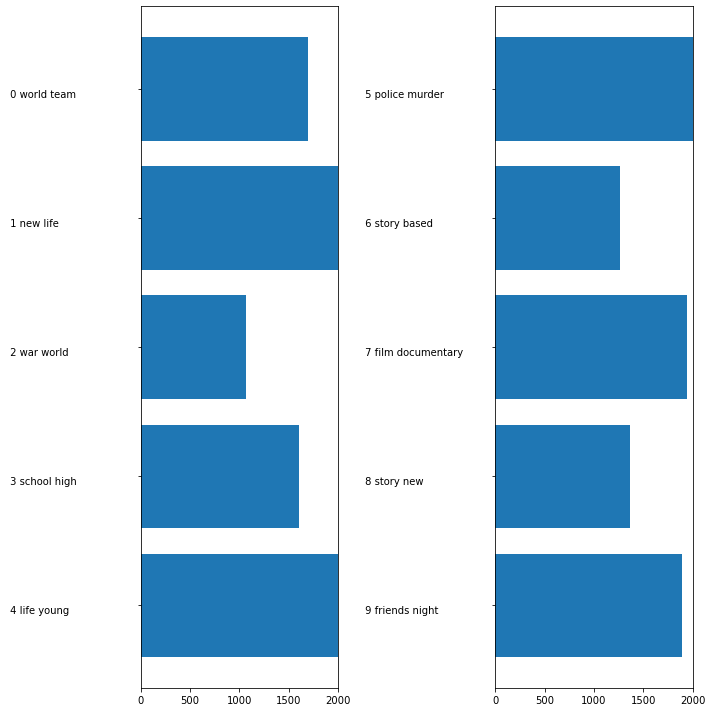

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
n_topics=10

# two column bar chart:
for col in [0, 1]: 
    start = col*int(n_topics/2)
    end=(col+1)*int(n_topics/2)
    ax[col].barh(np.arange(int(n_topics/2)), np.sum(document_topics, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(int(n_topics/2))) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    plt.tight_layout()

### Check our model with evaluation dataset

In [9]:
#create a datframe with the evaluation dataset
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc, roc_auc_score
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')
eval_df = pd.read_csv("movie_story_evaluation_file.csv")
genre_df=pd.read_csv("movies.csv")
eval_df.head()

,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."


In [10]:

comb_eval_df = pd.merge(eval_df, genre_df, left_on='movie_id', right_on='movieId')
comb_eval_df.head()

,movie_id,story,movieId,title,genres
0,122349,Growing up in the Mission district of San Fran...,122349,La Mission (2009),Drama
1,122351,A soldier returns home from the Iraq war only ...,122351,Stir of Echoes: The Homecoming (2007),Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,122361,Primates of the Caribbean (2012),Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",187901,Theri (2016),Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",187903,Kaththi (2014),Action|Drama|Romance


In [11]:
#merge the two dataframes using common identifier movieid and create a new dataframe
comb_eval_df= comb_eval_df.drop(columns=['movieId','title'], axis=1)
comb_eval_df.head()

,movie_id,story,genres
0,122349,Growing up in the Mission district of San Fran...,Drama
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance


In [12]:
#create the filters 
comb_eval_df = comb_eval_df[comb_eval_df["genres"].str.contains("no genres listed") == False]
drama = comb_eval_df['genres'].str.contains('Drama','drama')
not_drama= comb_eval_df['genres'].str.contains('Drama','drama')==False

In [13]:
#apply filters on the dataset
comb_eval_df.genres[drama]= 1
comb_eval_df.genres[not_drama]=0


In [14]:
#rename the columns
comb_eval_df = comb_eval_df.rename(columns={'movie_id':'movieid', 'genres':'DramaGenre'})

In [15]:
#import regex module
import re
# function for text cleaning 
def clean_text(text):
    # remove backslash-and subsequent charecters and digits
    text= re.sub(r'\\\w.+?\d*','',text) 
    #remove only backslashes
    text = re.sub(r'\\','',text)
    #remove all digits from text
    text = re.sub(r'\d','',text)
    #remove all non alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]','',text)
    
    return text

In [16]:
#clean the dataset
comb_eval_df['story'] = comb_eval_df['story'].apply(lambda x: clean_text(x))

In [17]:
#create predictor and criterion datasets from the filtered data
data_eval = comb_eval_df['story']
y_eval= comb_eval_df['DramaGenre']
y_eval=y_eval.astype('int')

In [30]:
import pickle
pickle.dump(comb_eval_df, open('comb_eval_df.pkl','wb'))

In [19]:
#visualize a random story
data_eval[10]

'A pawn shop proprietor buys used goods from desperate locals  as much to play perverse power games as for his own livelihood but when the perfect rump and a backedup toilet enter his life he loses all control'

In [20]:
#check shape of the new dataset
comb_eval_df.shape

(3302, 3)

In [21]:
#initialize the 300 dim glove function
from tqdm import tqdm
embeddings_index = dict()
f = open('glove.42B.300d/glove.42B.300d.txt',encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

1917494it [03:22, 9450.30it/s] 


In [23]:
#create a function to embed the text data
def embed(X):
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize

    from tqdm import tqdm
    embeddings = []
    for text in tqdm(X):

        base_embedding = np.zeros((300,))
        word_count = 0
        for token in word_tokenize(text):
            token = token.lower()
            if token in stopwords.words('english'):
                continue
            try:
                base_embedding += embeddings_index[token]
                word_count +=1
            except:
                continue
        base_embedding = base_embedding/word_count
        embeddings.append(base_embedding)
    return embeddings


In [24]:
#initialize the predictor as embedded array
embeddings=embed(data_eval)
X_eval = np.array(embeddings, dtype='float32')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas_nmr2rze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 3302/3302 [00:39<00:00, 84.09it/s] 


In [27]:
#check accuracy of prediction on the evaluation dataset with our selected SVM model
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score
SVM_model = pickle.load(open('SVM_model.pkl','rb'))
y_test_hat_eval = SVM_model.predict(X_eval)
print("Accuracy with SVM Classifier on evaluation dataset: {}".format(round(accuracy_score(y_eval,y_test_hat_eval) * 100,2)))

Accuracy with SVM Classifier on evaluation dataset: 69.81


In [581]:
print(f"\033[1m SVM model scores: \033[0m")#print model name in bold
y_pred= SVM_model.predict(X_eval) #predict with test data

pr = precision_score(y_eval, y_pred, average='macro')#calculate precision score
print(f"Precision score of SVM model with evaluation dataset is: ",round(pr*100,2))#print precision score
rc = recall_score(y_eval, y_pred, average='macro')#calculate recall score
print(f"Recall score of SVM model with evaluation dataset is : ",round(rc*100,2))#print recall score
f1 = f1_score(y_eval, y_pred, average='weighted')#calculate F1 score
print(f"F1 score of SVM model with evaluation dataset is : ",round(f1*100,2))#print F1 score
#auc = roc_auc_score(y_eval, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_eval, SVM_model.decision_function(X_eval))
print(f"AUC score of SVM model with evaluation dataset is : ",round(auc*100,2))#print roc_auc score

 SVM model scores: 
Precision score of SVM model with evaluation dataset is:  69.95
Recall score of SVM model with evaluation dataset is :  70.33
F1 score of SVM model with evaluation dataset is :  69.95
AUC score of SVM model with evaluation dataset is :  77.45


### Prediction function which takes MovieId as input and tells if the Genre is Drama or Not Drama

In [31]:
#function to predict genre of an individual movie(if it belongs to Drama or not Drama)
def predict_genre():
    import pickle
    
    SVM_model = pickle.load(open('SVM_model.pkl','rb'))
    comb_eval_df = pickle.load(open('comb_eval_df.pkl','rb'))
    import numpy as np
    from sklearn.metrics import accuracy_score
    num = int(input("Enter movie ID: "))
    h=pd.DataFrame(comb_eval_df.loc[(comb_eval_df.movieid==num)]).reset_index()
    X=h.story[0]
    y=np.array(h.DramaGenre)
    

    text= clean_text(X)
    gen = embed(text)
    x_ev=np.array(gen, dtype='float32')
    x= np.nan_to_num(x_ev)
    a,b=x.shape
    c= np.ones(a,)
    y= y*c
    y= y.astype('int32')

    pre = SVM_model.predict(x)
    ac= accuracy_score(y,pre)

    if (1-ac)>.5:
        print("Drama genre")
    else:
        print("Not drama genre")
    print()
    print("Story:")
    print(X)



In [939]:
#visualize the top 20 values in dataframe
comb_eval_df.head(20)
                 

,movieid,story,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,1
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer But ...,0
3,187901,When an honest cop Vijay Kumars family is ruth...,0
4,187903,Kathiresan aka Kaththi a criminal escapes from...,1
5,56835,At popular South Beach University filthy rich ...,0
6,56837,Witty playful and utterly magical the story is...,1
7,56846,Rainbow press reporter Ludo is sentenced to m...,0
8,122387,Nemesis is the hottest rapper in raps hottest ...,1
9,187937,Jacek loves heavy metal and his dog He convert...,1


##### Predict with the prediction function

In [33]:
#run the function to predict the genre of movie by taking movie id as user input
predict_genre()

Enter movie ID: 56837


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas_nmr2rze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 252/252 [00:00<00:00, 3422.10it/s]


Drama genre

Story:
Witty playful and utterly magical the story is a compelling romantic adventure in which Rosalind and Orlandos celebrated courtship is played out against a backdrop of political rivalry banishment and exile in the Forest of Arden  set in thcentury Japan


<ul><b>It looks like our model is working nicely and accurately to predict genre of an individual movie by reading through the story of that movie</b>